In [1]:
# Imports
import json
from pandas.io.json import json_normalize
import requests
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from textwrap import wrap
import folium
import plotly.graph_objects as go


In [2]:
# Methods
def unpack_column(dataFrame,col_name):
    newDf = dataFrame.from_records(dataFrame[col_name].dropna().tolist())
    return newDf

def unpack_and_destroy(dataFrame,column):
    temp = unpack_column(dataFrame,column)
    for col in temp.columns:
        dataFrame[col] = temp[col]
    #dataFrame = dataFrame.drop(columns=[column])
    return dataFrame

def sort_db_value(db,value,asc=False):
    return db.sort_values(by = value, ascending = asc)

def freq_array(freq_list):
    freq = []
    for i in freq_list:
        freq.append(i)
    return freq

def set_labels(freq, ax,horz_shift=.2,vert_shift=1000,w="bold",fsize=10,c="b"):
    for i, v in enumerate(freq):
        ax.text(i-horz_shift,v+vert_shift, str(round(v,2)), weight = w,fontsize=fsize,color = c)
        
def wrap_axis_labels(labels_list,wrap_length=13):
    labels_list = [ '\n'.join(wrap(l, wrap_length)) for l in labels_list]
    return labels_list

In [3]:
region1_df = pd.read_csv('Data/eo1.csv')
region2_df = pd.read_csv('Data/eo2.csv')
region3_df = pd.read_csv('Data/eo3.csv')

In [4]:
all_regions_df = pd.concat([region1_df,region2_df,region3_df])

In [5]:
all_regions_df.shape

(1711634, 28)

In [6]:
all_regions_df = all_regions_df[all_regions_df["DEDUCTIBILITY"] == 1]
all_regions_df.shape

(1418907, 28)

In [7]:
# all_regions_df = all_regions_df.drop(\
#     columns=['FILING_REQ_CD',"PF_FILING_REQ_CD","STATUS","NTEE_CD"])

In [17]:
# # State Count Bar Graph
# state_df_count = all_regions_df.groupby("STATE").size()
# states = list(state_df_count.index.values)
# freq = freq_array(state_df_count)

# fig,ax = plt.subplots(figsize = (40,20))
# ax.bar(states,freq, color = "b");
# ax.set_yticks(np.arange(0,np.max(state_df_count)+10000,10000));
# ax.set_title("Number of Organizations by State", weight = "bold", fontsize = 40);
# ax.set_xlabel("State", fontsize=30, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=30, weight = "bold");

# set_labels(state_df_count,ax,.4,1500,c="k");

In [16]:
# state_df_count = all_regions_df.groupby("STATE").size().reset_index(name="Frequency").sort_values(by="Frequency",ascending=False)
# state_df_count.iloc[:10]

In [18]:
# # State Count Bar Graph (Top 10)
# state_df_count = all_regions_df.groupby("STATE").size().reset_index(name="Frequency").sort_values(by="Frequency",ascending=False)
# state_df_count = state_df_count.iloc[:10]

# states = state_df_count['STATE']
# freq = freq_array(state_df_count['Frequency'])
# fig,ax = plt.subplots(figsize = (20,10))
# ax.bar(states,freq, color = "b");

# ax.set_yticks(np.arange(0,np.max(freq)+20000,20000));
# ax.set_title("Number of Organizations by State (Top 10)", weight = "bold", fontsize = 30);
# ax.set_xlabel("State", fontsize=25, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=25, weight = "bold");
# ax.set_yticklabels(np.arange(0,np.max(freq)+20000,20000), weight="bold", fontsize =20) ;
# ax.set_xticklabels(states, weight="bold",fontsize=20);

# set_labels(freq,ax,.3,1500,c="k",fsize=20);

# plt.savefig("Num_Orgs_Top_10_States")

In [11]:
# my_USA_map = "Data/us-states.json"
# map = folium.Map(location=[40, -100], zoom_start=4)

In [20]:
# state_df = all_regions_df.groupby("STATE").size().reset_index(name="Count")

In [13]:
# map.choropleth(geo_data=my_USA_map, data=state_df,
#              columns=['STATE', 'Count'],
#              key_on='feature.id',
#              fill_color='YlGn', fill_opacity=0.8, line_opacity=0.2,
#              legend_name='Charity Count', hover_text=state_df["STATE"])
# map

In [61]:
## Adding in Population Data
# pop_data = pd.read_csv('Data/acs2017_census_tract_data.csv')
# pop_data = pop_data.groupby("State")["TotalPop"].sum().reset_index(name="Population")
# pop_abbrv = pd.read_csv('Data/states.csv')
# pop_df = pd.merge(pop_data, pop_abbrv, on='State')
# pop_df["STATE"] = pop_df["Abbreviation"]
# pop_df = pop_df.drop(columns=["Abbreviation"])

In [62]:
# income_df = all_regions_df.groupby("STATE")["INCOME_AMT"].sum().reset_index(name="Sum_Income")

In [63]:
# add_pop = pd.merge(pop_df, income_df, on = "STATE")
# add_pop["Income_Per_Capita"] = add_pop["Sum_Income"] / add_pop["Population"]

In [45]:
# # Dropping District of Colombia
# add_pop = add_pop.drop(add_pop.index[8])
#Dropping Deleware
# add_pop = add_pop.drop(add_pop.index[7])
add_pop.head(5)

,State,Population,STATE,Sum_Income,Income_Per_Capita
0,Alabama,4850771,AL,1.507904e+10,3108.586810
1,Alaska,738565,AK,6.238799e+09,8447.189940
2,Arizona,6809946,AZ,6.883885e+10,10108.575488
3,Arkansas,2977944,AR,2.014406e+10,6764.417757
4,California,38982847,CA,4.220803e+11,10827.334289


In [60]:
# # state_df = add_pop.groupby("STATE")["INCOME_AMT"].sum().reset_index(name="Sum")
# fig = go.Figure(data=go.Choropleth(
#     locations = add_pop['STATE'],
#     z=add_pop['Income_Per_Capita'],
#     locationmode='USA-states',
#     colorscale='Blues',
#     autocolorscale=False,
#     text=add_pop['STATE'], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Income Per Capita"
# ))

# fig.update_layout(
#     title_text='Charity Income Per Capita by State - IRS<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [59]:
# # State Per Capita Bar Graph
# state_df_count = add_pop.groupby("STATE")['Income_Per_Capita'].sum()
# state_df_count = state_df_count.sort_values(ascending=False).iloc[:10]

# states = list(state_df_count.index.values)
# freq = freq_array(state_df_count)

# fig,ax = plt.subplots(figsize = (20,10))
# ax.bar(states,freq, color = "b");

# ax.set_yticks(np.arange(0,np.max(freq)+20000,20000));
# ax.set_title("Charity Income Per Capita by State (Top 10)", weight = "bold", fontsize = 30);
# ax.set_xlabel("State", fontsize=25, weight = "bold");
# ax.set_ylabel("Income Per Capita ($)", fontsize=25, weight = "bold");
# ax.set_yticklabels(np.arange(0,np.max(freq)+20000,20000), weight="bold", fontsize =20) ;
# ax.set_xticklabels(states, weight="bold",fontsize=20);

# set_labels(freq,ax,.4,1500,c="k",fsize=17);

# plt.savefig("Inc_Per_Cap_Orgs_Top_10_States")

In [ ]:
all_regions_df.sort_values(by="INCOME_AMT",ascending=False).head()

In [ ]:
total_assets = all_regions_df.groupby("STATE")["ASSET_AMT"].agg("sum").reset_index(name="Sum")
total_assets.head()

In [64]:
# fig = go.Figure(data=go.Choropleth(
#     locations = total_assets['STATE'],
#     z=total_assets['Sum'],
#     locationmode='USA-states',
#     colorscale='Reds',
#     autocolorscale=False,
#     text=total_assets['STATE'], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Sum of Assets"
# ))

# fig.update_layout(
#     title_text='Sum of US Charitable Organizations Assets by State<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [65]:
# def heatmap_USA_by_state(dataFrame,state_col_name,zoom_col_name,title,bar_title,action="sum"):
#     temp_df = dataFrame.groupby(state_col_name)[zoom_col_name].agg(action).reset_index(name=action)
    
#     fig = go.Figure(data=go.Choropleth(
#     locations = temp_df[state_col_name],
#     z=temp_df[action],
#     locationmode='USA-states',
#     colorscale='Reds',
#     autocolorscale=False,

#     text = temp_df[state_col_name],

#     marker_line_color='black', # line markers between states
#     colorbar_title=bar_title
#     ))

#     fig.update_layout(
#         title_text=title+'<br>(Hover for breakdown)',
#         geo = dict(
#             scope='usa',
#             projection=go.layout.geo.Projection(type = 'albers usa'),
#             showlakes=True, # lakes
#             lakecolor='rgb(255, 255, 255)'),
#     )

#     fig.show()


In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = add_pop['STATE'],
    z=add_pop['Income_Per_Capita'],
    locationmxode='USA-states',
    colorscale='Blues',
    autocolorscale=False,
    text=add_pop['STATE'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Income Per Capita"
))

fig.update_layout(
    title_text='Charity Income Per Capita by State - IRS<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [75]:
## GDP Per Capita DataFrame
gdp_df = pd.read_csv('Data/bea-gdp-by-state.csv')
gdp_df_2017 = gdp_df[['Area','2017']]
gdp_df_2017 = gdp_df_2017.drop(gdp_df_2017.index[0])
gdp_df_2017["State"] = gdp_df_2017["Area"]

In [83]:
## Merge GDP Per Capita
pop_abbrv = pd.read_csv('Data/states.csv')
GDP_pop_df = pd.merge(gdp_df_2017, pop_abbrv, on='State')
GDP_pop_df["STATE"] = GDP_pop_df["Abbreviation"]
GDP_pop_df = GDP_pop_df.drop(columns=["Abbreviation"])

In [75]:
## GDP Per Capita DataFrame
gdp_df = pd.read_csv('Data/bea-gdp-by-state.csv')
gdp_df_2017 = gdp_df[['Area','2017']]
gdp_df_2017 = gdp_df_2017.drop(gdp_df_2017.index[0])
gdp_df_2017["State"] = gdp_df_2017["Area"]

In [83]:
## Merge GDP Per Capita
pop_abbrv = pd.read_csv('Data/states.csv')
GDP_pop_df = pd.merge(gdp_df_2017, pop_abbrv, on='State')
GDP_pop_df["STATE"] = GDP_pop_df["Abbreviation"]
GDP_pop_df = GDP_pop_df.drop(columns=["Abbreviation"])

In [91]:
GDP_pop_df = pd.merge(GDP_pop_df, pop_df, on = "STATE")

In [93]:
GDP_pop_df['GDP'] = GDP_pop_df["2017"] * GDP_pop_df['Population']

In [94]:
GDP_pop_df.head()

,Area,2017,State_x,STATE,State_y,Population,GDP
0,Alabama,37508,Alabama,AL,Alabama,4850771,181942718668
1,Alaska,63610,Alaska,AK,Alaska,738565,46980119650
2,Arizona,39583,Arizona,AZ,Arizona,6809946,269558092518
3,Arkansas,36714,Arkansas,AR,Arkansas,2977944,109332236016
4,California,60359,California,CA,California,38982847,2352965662073


In [96]:
##Merge GDP Per Capita with Income
income_df = all_regions_df.groupby("STATE")["INCOME_AMT"].sum().reset_index(name="Sum_Income")
GDP_Income_df = pd.merge(GDP_pop_df, income_df, on = "STATE")

In [97]:
## Adding New Columns of Interest
GDP_Income_df["Income_Per_State_GDP"] = round((GDP_Income_df['Sum_Income'] / GDP_Income_df['GDP']),2)

In [100]:
fig = go.Figure(data=go.Choropleth(
    locations = GDP_Income_df['STATE'],
    z=GDP_Income_df['Income_Per_State_GDP'],
    locationmode='USA-states',
    colorscale='Blues',
    autocolorscale=False,
    text=GDP_Income_df['STATE'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Income / State GDP"
))

fig.update_layout(
    title_text='Charity Income / State GDP - IRS<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

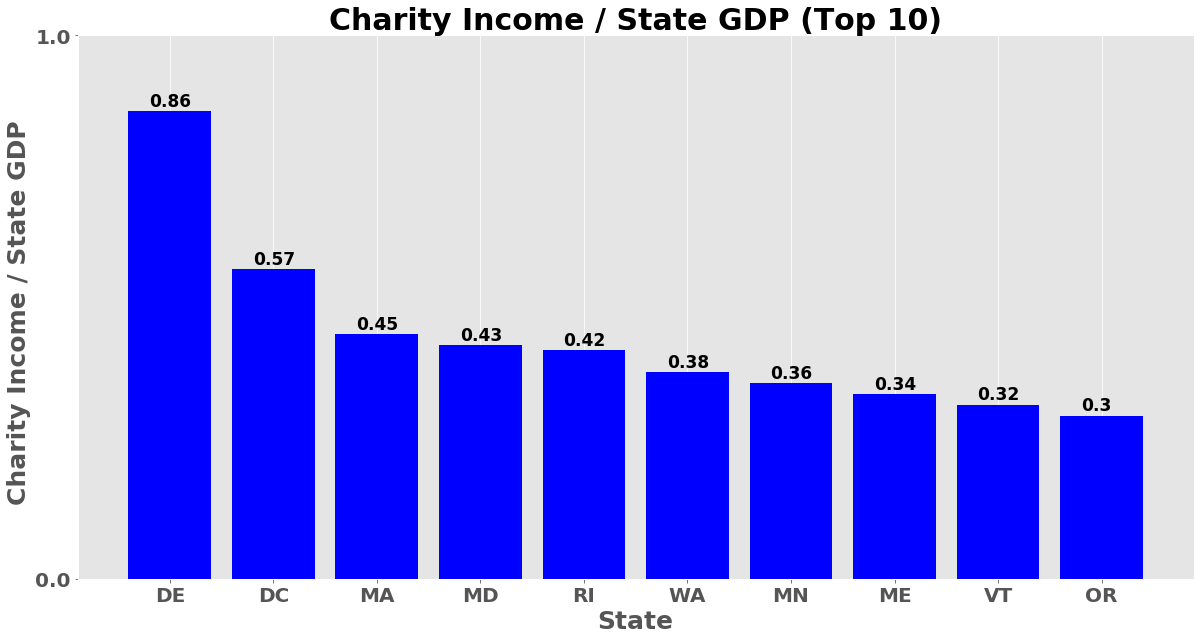

In [123]:
# State Per Capita Bar Graph
state_df_count = GDP_Income_df.groupby("STATE")['Income_Per_State_GDP'].sum()
state_df_count = state_df_count.sort_values(ascending=False).iloc[:10]

states = list(state_df_count.index.values)
freq = freq_array(state_df_count)

fig,ax = plt.subplots(figsize = (20,10))
ax.bar(states,freq, color = "b");

ax.set_yticks(np.arange(0,1.01,1));
ax.set_title("Charity Income / State GDP (Top 10)", weight = "bold", fontsize = 30);
ax.set_xlabel("State", fontsize=25, weight = "bold");
ax.set_ylabel("Charity Income / State GDP ", fontsize=25, weight = "bold");
ax.set_yticklabels(np.arange(0,1.01,1), weight="bold", fontsize =20) ;
ax.set_xticklabels(states, weight="bold",fontsize=20);

set_labels(freq,ax,.2,.01,c="k",fsize=17);

plt.savefig("Inc_Per_Cap_Orgs_Top_10_States")

In [88]:
GDP_Income_df.head()

,Area,2017,State,STATE,Sum_Income,Income_Per_GDP
0,Alabama,37508,Alabama,AL,1.507904e+10,402022.04
1,Alaska,63610,Alaska,AK,6.238799e+09,98078.90
2,Arizona,39583,Arizona,AZ,6.883885e+10,1739101.46
3,Arkansas,36714,Arkansas,AR,2.014406e+10,548675.09
4,California,60359,California,CA,4.220803e+11,6992831.49


In [84]:
GDP_pop_df.head()

,Area,2017,State,STATE
0,Alabama,37508,Alabama,AL
1,Alaska,63610,Alaska,AK
2,Arizona,39583,Arizona,AZ
3,Arkansas,36714,Arkansas,AR
4,California,60359,California,CA


In [85]:
##Merge GDP Per Capita with Income
income_df = all_regions_df.groupby("STATE")["INCOME_AMT"].sum().reset_index(name="Sum_Income")
GDP_Income_df = pd.merge(GDP_pop_df, income_df, on = "STATE")

In [87]:
## Adding New Columns of Interest
GDP_Income_df["Income_Per_GDP"] = round((GDP_Income_df['Sum_Income'] / GDP_Income_df['2017']),2)

In [88]:
GDP_Income_df.head()

,Area,2017,State,STATE,Sum_Income,Income_Per_GDP
0,Alabama,37508,Alabama,AL,1.507904e+10,402022.04
1,Alaska,63610,Alaska,AK,6.238799e+09,98078.90
2,Arizona,39583,Arizona,AZ,6.883885e+10,1739101.46
3,Arkansas,36714,Arkansas,AR,2.014406e+10,548675.09
4,California,60359,California,CA,4.220803e+11,6992831.49


In [ ]:
# #Consider Adding Charity Names in Hover
# heatmap_USA_by_state(
#     all_regions_df,'STATE',"INCOME_AMT","Max Income Charities By State","Max Income","max"
# )

In [66]:
all_regions_df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN
